In [68]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

#np.random.seed(0)
N = 10000

NX = 100
NY = 100

x_points = np.random.randint(0, 100, N)
y_points = np.random.randint(0, 100, N)
values = np.random.randint(1, 100, N)

x_grid, y_grid = np.meshgrid(np.linspace(0, 100, NX), np.linspace(0, 100, NY))

In [69]:
@njit
def idw_numba(x_points, y_points, values, x_grid, y_grid, power=2, epsilon=1e-6):

    interpolated_values = np.zeros_like(x_grid)
    
    for i in range(x_grid.shape[0]):
        for j in range(y_grid.shape[1]):
            total_weight = 0
            weighted_sum = 0
            for k in range(len(x_points)):
                distance_squared = (x_points[k] - x_grid[i, j]) ** 2 + (y_points[k] - y_grid[i, j]) ** 2 + epsilon
                weight = 1.0 / distance_squared ** (power / 2)
                weighted_sum += values[k] * weight
                total_weight += weight
            interpolated_values[i, j] = weighted_sum / total_weight
    return interpolated_values

    
def idw(x_points, y_points, values, x_grid, y_grid, power=2, epsilon=1e-6):

    interpolated_values = np.zeros_like(x_grid)
    
    for i in range(x_grid.shape[0]):
        for j in range(y_grid.shape[1]):
            total_weight = 0
            weighted_sum = 0
            for k in range(len(x_points)):
                distance_squared = (x_points[k] - x_grid[i, j]) ** 2 + (y_points[k] - y_grid[i, j]) ** 2 + epsilon
                weight = 1.0 / distance_squared ** (power / 2)
                weighted_sum += values[k] * weight
                total_weight += weight
            interpolated_values[i, j] = weighted_sum / total_weight
    return interpolated_values

In [70]:
%%time
interpolated_values = idw(x_points, y_points, values, x_grid, y_grid)

CPU times: total: 3min 39s
Wall time: 3min 40s


In [71]:
%%time
interpolated_values_numba = idw_numba(x_points, y_points, values, x_grid, y_grid)

CPU times: total: 516 ms
Wall time: 534 ms


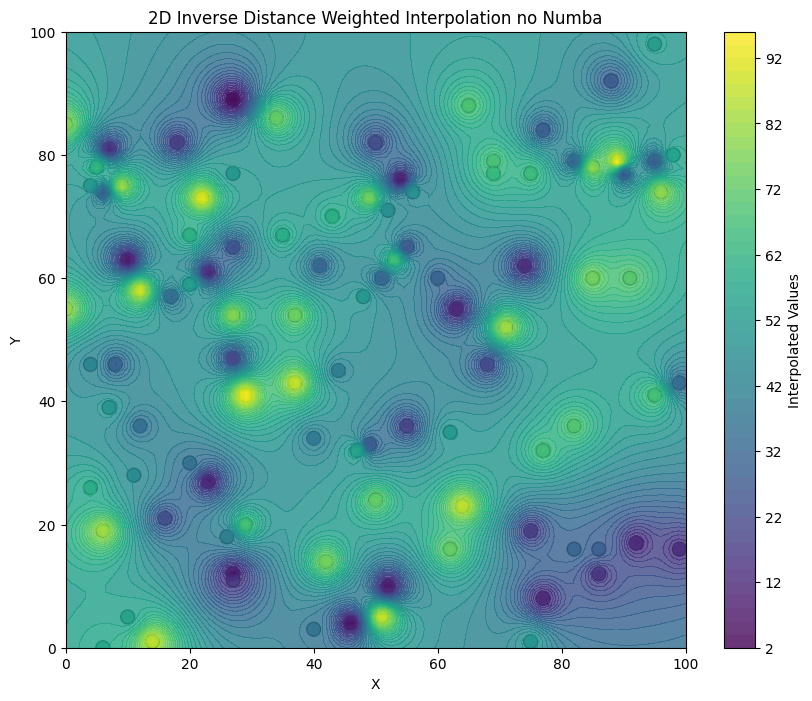

In [66]:
plt.figure(figsize=(10, 8))
plt.scatter(x_points, y_points, c=values, cmap='viridis', s=100, edgecolor='k', linewidth=1, alpha=0.8)
plt.contourf(x_grid, y_grid, interpolated_values, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(label='Interpolated Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Inverse Distance Weighted Interpolation no Numba')
plt.show()

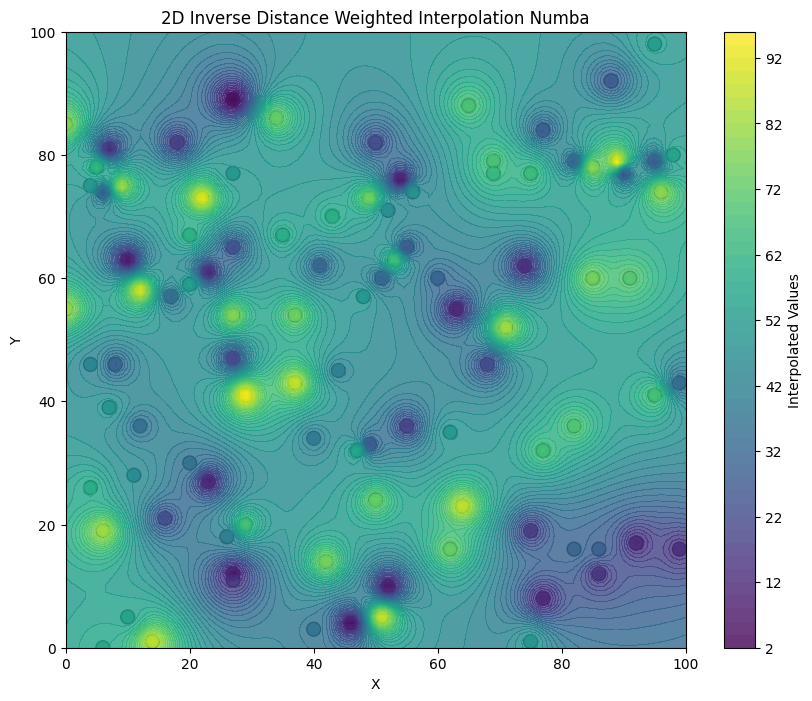

In [67]:
plt.figure(figsize=(10, 8))
plt.scatter(x_points, y_points, c=values, cmap='viridis', s=100, edgecolor='k', linewidth=1, alpha=0.8)
plt.contourf(x_grid, y_grid, interpolated_values_numba, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(label='Interpolated Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Inverse Distance Weighted Interpolation Numba')
plt.show()